# Lab 3: Clustering Analysis Using K-Means and K-Medoids
# Name: Bishesh
# Date: 3 Nov 2025

In [7]:
!pip install numpy<2
!pip install scikit-learn-extra
!pip install pyclustering

/bin/bash: line 1: 2: No such file or directory


In [10]:

# Step 1: Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import random



In [11]:
# Step 2: Load Dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [12]:
# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Metrics for K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Adjusted Rand Index:", kmeans_ari)



K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index: 0.8974949815093207


In [14]:
# Step 4: K-Medoids Clustering
# Initialize medoids randomly
initial_medoids = random.sample(range(len(X_scaled)), 3)
kmedoids_instance = kmedoids(X_scaled, initial_medoids, data_type='points')
kmedoids_instance.process()
kmedoids_labels = kmedoids_instance.get_clusters() # Removed the np.array conversion

# Convert cluster list to label array
kmedoids_label_array = np.zeros(len(X_scaled))
for cluster_index, cluster in enumerate(kmedoids_labels):
    for sample_index in cluster:
        kmedoids_label_array[sample_index] = cluster_index

# Metrics for K-Medoids
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_label_array)
kmedoids_ari = adjusted_rand_score(y, kmedoids_label_array)

print("K-Medoids Silhouette Score:", kmedoids_silhouette)
print("K-Medoids Adjusted Rand Index:", kmedoids_ari)

K-Medoids Silhouette Score: 0.2676220575785755
K-Medoids Adjusted Rand Index: 0.7411365432162113


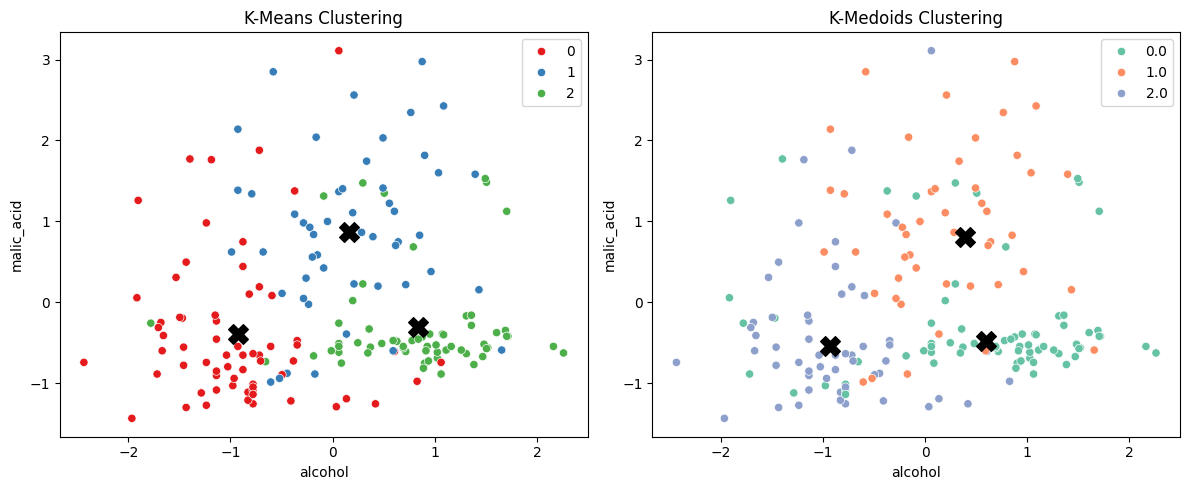

In [15]:
# Step 5: Visualization
plt.figure(figsize=(12, 5))

# K-Means scatter
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X')
plt.title("K-Means Clustering")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# K-Medoids scatter
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmedoids_label_array, palette='Set2')
medoids_points = X_scaled[kmedoids_instance.get_medoids()]
plt.scatter(medoids_points[:, 0], medoids_points[:, 1], s=200, c='black', marker='X')
plt.title("K-Medoids Clustering")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()
